In [98]:
import os
import json

import numpy as np
import pandas as pd
from pandas.io.json import json_normalize
import matplotlib.pyplot as plt
import plotly
import plotly.offline as py
import plotly.plotly as py
from plotly.graph_objs import Scatter, Layout
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot, plot
from plotly import tools
#JSON_COLUMNS = ['device', 'geoNetwork', 'totals', 'trafficSource']
#converters={column: json.loads for column in JSON_COLUMNS}
#print(converters)
import plotly.plotly as py
import plotly.graph_objs as go
def load_df(csv_path='../input/train.csv', nrows=None):
    JSON_COLUMNS = ['device', 'geoNetwork', 'totals', 'trafficSource']
    
    df = pd.read_csv(csv_path, 
                     converters={column: json.loads for column in JSON_COLUMNS}, 
                     dtype={'fullVisitorId': 'str'}, # Important!!
                     nrows=nrows)
    
    for column in JSON_COLUMNS:
        column_as_df = json_normalize(df[column])
        column_as_df.columns = [f"{column}.{subcolumn}" for subcolumn in column_as_df.columns]
        df = df.drop(column, axis=1).merge(column_as_df, right_index=True, left_index=True)
    print(f"Loaded {os.path.basename(csv_path)}. Shape: {df.shape}")
    return df

In [102]:
df_train = load_df('train_v2.csv',nrows=50000)
df_test = load_df("test_v2.csv",nrows=50000)
#print(os.listdir("../input"))
df_train.to_csv("train-flattened.csv", index=False)
df_test.to_csv("test-flattened.csv", index=False)


df_train["totals.transactionRevenue"] = df_train["totals.transactionRevenue"].astype('float')
#gdf = df_train.groupby("fullVisitorId")["totals.transactionRevenue"].sum().reset_index()
'''plt.figure(figsize=(8,6))
plt.scatter(range(gdf.shape[0]), np.sort(np.log1p(gdf["totals.transactionRevenue"].values)))
plt.xlabel('index', fontsize=12)
plt.ylabel('TransactionRevenue', fontsize=12)
plt.show()
'''


Loaded train_v2.csv. Shape: (50000, 59)
Loaded test_v2.csv. Shape: (50000, 59)


'plt.figure(figsize=(8,6))\nplt.scatter(range(gdf.shape[0]), np.sort(np.log1p(gdf["totals.transactionRevenue"].values)))\nplt.xlabel(\'index\', fontsize=12)\nplt.ylabel(\'TransactionRevenue\', fontsize=12)\nplt.show()\n'

In [103]:
nzi = pd.notnull(df_train["totals.transactionRevenue"]).sum()
nzr = (gdf["totals.transactionRevenue"]>0).sum()
print("Number of instances in train set with non-zero revenue : ", nzi, " and ratio is : ", nzi / df_train.shape[0])
print("Number of unique customers with non-zero revenue : ", nzr, "and the ratio is : ", nzr / gdf.shape[0])

print("Number of unique visitors in train set : ",df_train.fullVisitorId.nunique(), " out of rows : ",df_train.shape[0])
print("Number of unique visitors in test set : ",df_test.fullVisitorId.nunique(), " out of rows : ",df_test.shape[0])
print("Number of common visitors in train and test set : ",len(set(df_train.fullVisitorId.unique()).intersection(set(df_test.fullVisitorId.unique())) ))

Number of instances in train set with non-zero revenue :  468  and ratio is :  0.00936
Number of unique customers with non-zero revenue :  189 and the ratio is :  0.010280678851174934
Number of unique visitors in train set :  45639  out of rows :  50000
Number of unique visitors in test set :  43131  out of rows :  50000
Number of common visitors in train and test set :  103


In [104]:
print("Number of instances in train set with non-zero revenue : ", nzi, " and ratio is : ", nzi / df_train.shape[0])
print("Number of unique customers with non-zero revenue : ", nzr, "and the ratio is : ", nzr / gdf.shape[0])

print("Number of unique visitors in train set : ",df_train.fullVisitorId.nunique(), " out of rows : ",df_train.shape[0])
print("Number of unique visitors in test set : ",df_test.fullVisitorId.nunique(), " out of rows : ",df_test.shape[0])
print("Number of common visitors in train and test set : ",len(set(df_train.fullVisitorId.unique()).intersection(set(df_test.fullVisitorId.unique())) ))

Number of instances in train set with non-zero revenue :  468  and ratio is :  0.00936
Number of unique customers with non-zero revenue :  189 and the ratio is :  0.010280678851174934
Number of unique visitors in train set :  45639  out of rows :  50000
Number of unique visitors in test set :  43131  out of rows :  50000
Number of common visitors in train and test set :  103


In [105]:
const_cols = [c for c in df_train.columns if df_train[c].nunique(dropna=False)==1 ]

In [106]:
const_cols

['socialEngagementType',
 'device.browserSize',
 'device.browserVersion',
 'device.flashVersion',
 'device.language',
 'device.mobileDeviceBranding',
 'device.mobileDeviceInfo',
 'device.mobileDeviceMarketingName',
 'device.mobileDeviceModel',
 'device.mobileInputSelector',
 'device.operatingSystemVersion',
 'device.screenColors',
 'device.screenResolution',
 'geoNetwork.cityId',
 'geoNetwork.latitude',
 'geoNetwork.longitude',
 'geoNetwork.networkLocation',
 'totals.visits',
 'trafficSource.adwordsClickInfo.criteriaParameters']

In [107]:
const_cols = [c for c in df_train.columns if df_train[c].nunique(dropna=False)==1 ]

def horizontal_bar_chart(cnt_srs, color):
    trace = go.Bar(
        y=cnt_srs.index[::-1],
        x=cnt_srs.values[::-1],
        showlegend=False,
        orientation = 'h',
        marker=dict(
            color=color,
        ),
    )
    return trace

# Device Browser
cnt_srs =  df_train.groupby('device.browser')['totals.transactionRevenue'].agg(['size', 'count', 'mean'])
cnt_srs.columns = ["count", "count of non-zero revenue", "mean"]
cnt_srs = cnt_srs.sort_values(by="count", ascending=False)
trace1 = horizontal_bar_chart(cnt_srs["count"].head(10), 'rgba(50, 171, 96, 0.6)')
trace2 = horizontal_bar_chart(cnt_srs["count of non-zero revenue"].head(10), 'rgba(50, 171, 96, 0.6)')
trace3 = horizontal_bar_chart(cnt_srs["mean"].head(10), 'rgba(50, 171, 96, 0.6)')
cnt_srs
# Device Category
cnt_srs =  df_train.groupby('device.deviceCategory')['totals.transactionRevenue'].agg(['size', 'count', 'mean'])
cnt_srs.columns = ["count", "count of non-zero revenue", "mean"]
cnt_srs = cnt_srs.sort_values(by="count", ascending=False)
trace4 = horizontal_bar_chart(cnt_srs["count"].head(10), 'rgba(71, 58, 131, 0.8)')
trace5 = horizontal_bar_chart(cnt_srs["count of non-zero revenue"].head(10), 'rgba(71, 58, 131, 0.8)')
trace6 = horizontal_bar_chart(cnt_srs["mean"].head(10), 'rgba(71, 58, 131, 0.8)')
cnt_srs
# Operating system
cnt_srs = df_train.groupby('device.operatingSystem')['totals.transactionRevenue'].agg(['size', 'count', 'mean'])
cnt_srs.columns = ["count", "count of non-zero revenue", "mean"]
cnt_srs = cnt_srs.sort_values(by="count", ascending=False)
trace7 = horizontal_bar_chart(cnt_srs["count"].head(10), 'rgba(246, 78, 139, 0.6)')
trace8 = horizontal_bar_chart(cnt_srs["count of non-zero revenue"].head(10),'rgba(246, 78, 139, 0.6)')
trace9 = horizontal_bar_chart(cnt_srs["mean"].head(10),'rgba(246, 78, 139, 0.6)')
cnt_srs

,count,count of non-zero revenue,mean
device.operatingSystem,,,
Windows,19247,80,1.806401e+08
Macintosh,13596,258,1.306040e+08
Android,7324,17,1.208553e+08
iOS,5997,26,3.596500e+07
Linux,1830,37,5.177216e+07
Chrome OS,1507,49,1.450937e+08
(not set),337,0,NaN
Windows Phone,74,1,2.640000e+07
Samsung,27,0,NaN


In [108]:
 
fig = tools.make_subplots(rows=3, cols=3, vertical_spacing=0.04,
                          subplot_titles=["Device Browser - Count", "Device Browser - Non-zero Revenue Count", "Device Browser - Mean Revenue",
                                          "Device Category - Count",  "Device Category - Non-zero Revenue Count", "Device Category - Mean Revenue",
                                          "Device OS - Count", "Device OS - Non-zero Revenue Count", "Device OS - Mean Revenue"])

fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2, 1, 2)
fig.append_trace(trace3, 1, 3)
fig.append_trace(trace4, 2, 1)
fig.append_trace(trace5, 2, 2)
fig.append_trace(trace6, 2, 3)
fig.append_trace(trace7, 3, 1)
fig.append_trace(trace8, 3, 2)
fig.append_trace(trace9, 3, 3)

#py.sign_in('18610286052', 'i3ow0nZZbWaLW8wD98eQ') 
fig['layout'].update(height=1200, width=1200, paper_bgcolor='rgb(233,233,233)', title="Device Plots")
py.iplot(fig, filename='device-plots')

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]  [ (1,3) x3,y3 ]
[ (2,1) x4,y4 ]  [ (2,2) x5,y5 ]  [ (2,3) x6,y6 ]
[ (3,1) x7,y7 ]  [ (3,2) x8,y8 ]  [ (3,3) x9,y9 ]



PlotlyRequestError: Aw, snap! You tried to use our API as the user '18610286052', but the supplied API key doesn't match our records. You can view your API key at https://plot.ly/settings/api

You're most likely getting this message because your local credentials file isn't synced with the Plotly server you're communicating with.

Go to https://plot.ly/<language>/getting-started (e.g., https://plot.ly/python/getting-started) for more information.

Make sure that you're logged in as 18610286052.

Need help? Please try searching Plotly's <a href='http://stackoverflow.com/questions/tagged/plotly'>Stack Overflow channel</a>.

In [109]:
print("Variables not in test but in train : ", set(df_train.columns).difference(set(df_test.columns)))
print(list(df_train.columns))
print(list(df_test.columns))

Variables not in test but in train :  set()
['channelGrouping', 'customDimensions', 'date', 'fullVisitorId', 'hits', 'socialEngagementType', 'visitId', 'visitNumber', 'visitStartTime', 'device.browser', 'device.browserSize', 'device.browserVersion', 'device.deviceCategory', 'device.flashVersion', 'device.isMobile', 'device.language', 'device.mobileDeviceBranding', 'device.mobileDeviceInfo', 'device.mobileDeviceMarketingName', 'device.mobileDeviceModel', 'device.mobileInputSelector', 'device.operatingSystem', 'device.operatingSystemVersion', 'device.screenColors', 'device.screenResolution', 'geoNetwork.city', 'geoNetwork.cityId', 'geoNetwork.continent', 'geoNetwork.country', 'geoNetwork.latitude', 'geoNetwork.longitude', 'geoNetwork.metro', 'geoNetwork.networkDomain', 'geoNetwork.networkLocation', 'geoNetwork.region', 'geoNetwork.subContinent', 'totals.bounces', 'totals.hits', 'totals.newVisits', 'totals.pageviews', 'totals.sessionQualityDim', 'totals.timeOnSite', 'totals.totalTransacti

In [110]:
print("Variables not in test but in train : ", set(df_train.columns).difference(set(df_test.columns)))

Variables not in test but in train :  set()


In [111]:
df_train.head()

,channelGrouping,customDimensions,date,fullVisitorId,hits,socialEngagementType,visitId,visitNumber,visitStartTime,device.browser,...,trafficSource.adwordsClickInfo.gclId,trafficSource.adwordsClickInfo.isVideoAd,trafficSource.adwordsClickInfo.page,trafficSource.adwordsClickInfo.slot,trafficSource.campaign,trafficSource.isTrueDirect,trafficSource.keyword,trafficSource.medium,trafficSource.referralPath,trafficSource.source
0,Organic Search,"[{'index': '4', 'value': 'EMEA'}]",20171016,3162355547410993243,"[{'hitNumber': '1', 'time': '0', 'hour': '17',...",Not Socially Engaged,1508198450,1,1508198450,Firefox,...,NaN,NaN,NaN,NaN,(not set),NaN,water bottle,organic,NaN,google
1,Referral,"[{'index': '4', 'value': 'North America'}]",20171016,8934116514970143966,"[{'hitNumber': '1', 'time': '0', 'hour': '10',...",Not Socially Engaged,1508176307,6,1508176307,Chrome,...,NaN,NaN,NaN,NaN,(not set),NaN,NaN,referral,/a/google.com/transportation/mtv-services/bike...,sites.google.com
2,Direct,"[{'index': '4', 'value': 'North America'}]",20171016,7992466427990357681,"[{'hitNumber': '1', 'time': '0', 'hour': '17',...",Not Socially Engaged,1508201613,1,1508201613,Chrome,...,NaN,NaN,NaN,NaN,(not set),True,NaN,(none),NaN,(direct)
3,Organic Search,"[{'index': '4', 'value': 'EMEA'}]",20171016,9075655783635761930,"[{'hitNumber': '1', 'time': '0', 'hour': '9', ...",Not Socially Engaged,1508169851,1,1508169851,Chrome,...,NaN,NaN,NaN,NaN,(not set),NaN,(not provided),organic,NaN,google
4,Organic Search,"[{'index': '4', 'value': 'Central America'}]",20171016,6960673291025684308,"[{'hitNumber': '1', 'time': '0', 'hour': '14',...",Not Socially Engaged,1508190552,1,1508190552,Chrome,...,NaN,NaN,NaN,NaN,(not set),NaN,(not provided),organic,NaN,google


In [112]:
from sklearn import preprocessing
train_df=df_train
test_df=df_test
train_df["totals.transactionRevenue"].fillna(0, inplace=True)
train_y = train_df["totals.transactionRevenue"].values
train_id = train_df["fullVisitorId"].values
test_id = test_df["fullVisitorId"].values


# label encode the categorical variables and convert the numerical variables to float
cat_cols = ["channelGrouping", "device.browser", 
            "device.deviceCategory", "device.operatingSystem", 
            "geoNetwork.city", "geoNetwork.continent", 
            "geoNetwork.country", "geoNetwork.metro",
            "geoNetwork.networkDomain", "geoNetwork.region", 
            "geoNetwork.subContinent", "trafficSource.adContent", 
            "trafficSource.adwordsClickInfo.adNetworkType", 
            "trafficSource.adwordsClickInfo.gclId", 
            "trafficSource.adwordsClickInfo.page", 
            "trafficSource.adwordsClickInfo.slot", "trafficSource.campaign",
            "trafficSource.keyword", "trafficSource.medium", 
            "trafficSource.referralPath", "trafficSource.source",
            'trafficSource.adwordsClickInfo.isVideoAd', 'trafficSource.isTrueDirect']
for col in cat_cols:  #标签编码
    print(col)
    lbl = preprocessing.LabelEncoder()
    lbl.fit(list(train_df[col].values.astype('str')) + list(test_df[col].values.astype('str')))
    train_df[col] = lbl.transform(list(train_df[col].values.astype('str')))
    test_df[col] = lbl.transform(list(test_df[col].values.astype('str')))
    



channelGrouping
device.browser
device.deviceCategory
device.operatingSystem
geoNetwork.city
geoNetwork.continent
geoNetwork.country
geoNetwork.metro
geoNetwork.networkDomain
geoNetwork.region
geoNetwork.subContinent
trafficSource.adContent
trafficSource.adwordsClickInfo.adNetworkType
trafficSource.adwordsClickInfo.gclId
trafficSource.adwordsClickInfo.page
trafficSource.adwordsClickInfo.slot
trafficSource.campaign
trafficSource.keyword
trafficSource.medium
trafficSource.referralPath
trafficSource.source
trafficSource.adwordsClickInfo.isVideoAd
trafficSource.isTrueDirect


In [113]:
num_cols = ["totals.hits", "totals.pageviews", "visitNumber", "visitStartTime", 'totals.bounces',  'totals.newVisits']    
for col in num_cols:
   
    train_df[col] = train_df[col].astype(float)
    test_df[col] = test_df[col].astype(float)


In [115]:
import datetime
# Split the train dataset into development and valid based on time 
import time
count=train_df.iloc[:,0].size
count




50000

In [146]:
for i in range(10000,count):
    fmt = '%Y%m%d'  
    time_tuple = time.strptime(str(train_df['date'].loc[i]), fmt)
    year, month, day = time_tuple[:3]
    a_date = datetime.date(year, month, day)
    a_date
    train_df['date'].loc[i]=a_date



In [147]:
if train_df['date'].loc[49999] <=datetime.date(2018,5,31):
    print(True)



True


In [154]:
dev_df = train_df[train_df['date']<=datetime.date(2017,10,31)]
val_df = train_df[train_df['date']>datetime.date(2017,10,31)]
dev_y = np.log1p(dev_df["totals.transactionRevenue"].values)
val_y = np.log1p(val_df["totals.transactionRevenue"].values)

dev_X = dev_df[cat_cols + num_cols] 
val_X = val_df[cat_cols + num_cols] 
test_X = test_df[cat_cols + num_cols] 

In [164]:
val_df
import lightgbm as lgb

In [165]:

def run_lgb(train_X, train_y, val_X, val_y, test_X):
    params = {
        "objective" : "regression",
        "metric" : "rmse", 
        "num_leaves" : 30,
        "min_child_samples" : 100,
        "learning_rate" : 0.1,
        "bagging_fraction" : 0.7,
        "feature_fraction" : 0.5,
        "bagging_frequency" : 5,
        "bagging_seed" : 2018,
        "verbosity" : -1
    }
    
    lgtrain = lgb.Dataset(train_X, label=train_y)
    lgval = lgb.Dataset(val_X, label=val_y)
    model = lgb.train(params, lgtrain, 1000, valid_sets=[lgval], early_stopping_rounds=100, verbose_eval=100)
    
    pred_test_y = model.predict(test_X, num_iteration=model.best_iteration)
    pred_val_y = model.predict(val_X, num_iteration=model.best_iteration)
    return pred_test_y, model, pred_val_y

# Training the model #
pred_test, model, pred_val = run_lgb(dev_X, dev_y, val_X, val_y, test_X)

Training until validation scores don't improve for 100 rounds.
[100]	valid_0's rmse: 1.27315
Early stopping, best iteration is:
[17]	valid_0's rmse: 1.2302


In [166]:
pred_test

array([-0.02180218,  0.09210386, -0.00785721, ...,  0.03080504,
       -0.00558708,  0.00809297])

In [167]:
from sklearn import metrics
pred_val[pred_val<0] = 0
val_pred_df = pd.DataFrame({"fullVisitorId":val_df["fullVisitorId"].values})
val_pred_df["transactionRevenue"] = val_df["totals.transactionRevenue"].values
val_pred_df["PredictedRevenue"] = np.expm1(pred_val)
#print(np.sqrt(metrics.mean_squared_error(np.log1p(val_pred_df["transactionRevenue"].values), np.log1p(val_pred_df["PredictedRevenue"].values))))
val_pred_df = val_pred_df.groupby("fullVisitorId")["transactionRevenue", "PredictedRevenue"].sum().reset_index()
print(np.sqrt(metrics.mean_squared_error(np.log1p(val_pred_df["transactionRevenue"].values), np.log1p(val_pred_df["PredictedRevenue"].values))))

1.2708686562233542


In [168]:
pred_val

array([0.17426074, 0.02910225, 0.02910225, ..., 0.02910225, 0.05387262,
       0.03055731])

In [169]:
np.expm1(pred_val)

array([0.1903659 , 0.02952986, 0.02952986, ..., 0.02952986, 0.05535016,
       0.03102898])

In [170]:
sub_df = pd.DataFrame({"fullVisitorId":test_id})
pred_test[pred_test<0] = 0
sub_df["PredictedLogRevenue"] = np.expm1(pred_test)
sub_df = sub_df.groupby("fullVisitorId")["PredictedLogRevenue"].sum().reset_index()
sub_df.columns = ["fullVisitorId", "PredictedLogRevenue"]
sub_df["PredictedLogRevenue"] = np.log1p(sub_df["PredictedLogRevenue"])
sub_df.to_csv("baseline_lgb.csv", index=False)

In [171]:
sub_df.head()

,fullVisitorId,PredictedLogRevenue
0,0000087588448856385,0.008093
1,0000255704530917106,0.217076
2,0000528281082051132,0.017472
3,0000615377447828320,1.555672
4,0000677695778949032,0.354628


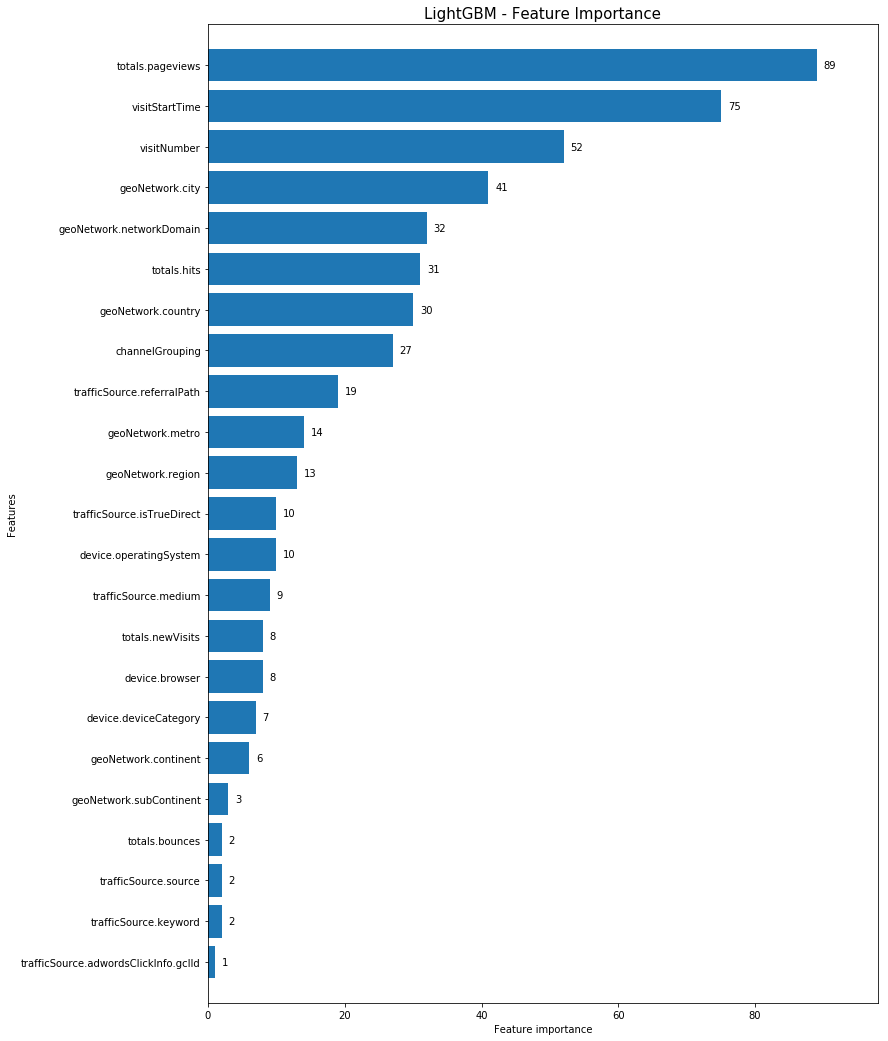

In [172]:
fig, ax = plt.subplots(figsize=(12,18))
lgb.plot_importance(model, max_num_features=50, height=0.8, ax=ax)
ax.grid(False)
plt.title("LightGBM - Feature Importance", fontsize=15)
plt.show()

In [1]:
import re
f='ab1'
f = re.sub("\D", "", f)

In [2]:
f

'1'